### Data Genel Bakış 

In [195]:
import pandas as pd
df = pd.read_csv("data.csv")

In [197]:
def check_df(dataframe,head = 5):
    print("------------------------- Shape -----------------------")
    print(dataframe.shape)
    print("------------------------- Types -----------------------")
    print(dataframe.dtypes)
    print("------------------------- Head ------------------------")
    print(dataframe.head(head))
    print("------------------------- Tail ------------------------")
    print(dataframe.tail(head))
    print("------------------------- NA --------------------------")
    print(dataframe.isnull().sum())
    numeric_cols = dataframe.select_dtypes(include=['number'])  # Select numeric columns only
    print(numeric_cols.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)
df.info()


------------------------- Shape -----------------------
(7043, 21)
------------------------- Types -----------------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
------------------------- Head ------------------------
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No    

### Numerik ve Kategorik degerlerin yakalanması 

In [200]:
def grab_col_names(dataframe ,cat_th = 10,car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

print(f"cat cols : {cat_cols}")
print(f"num cols : {num_cols}")
print(f"cat but cars : {cat_but_car}")


Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1
cat cols : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
num cols : ['tenure', 'MonthlyCharges']
cat but cars : ['customerID', 'TotalCharges']


### Kategorik Degisken Analizi 

In [203]:
import seaborn as sns

def cat_summary(dataframe ,col_name , plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), #kac kez tekrarlandıgını bulur 
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) #yüzdelik hesabı 
    print("##########################################")
    if plot:
        sns.countplot(x =dataframe[col_name],data = dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df,col)



        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################
                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
                 InternetService      Ratio
InternetService               

### Numerik Degisken Analizi 

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


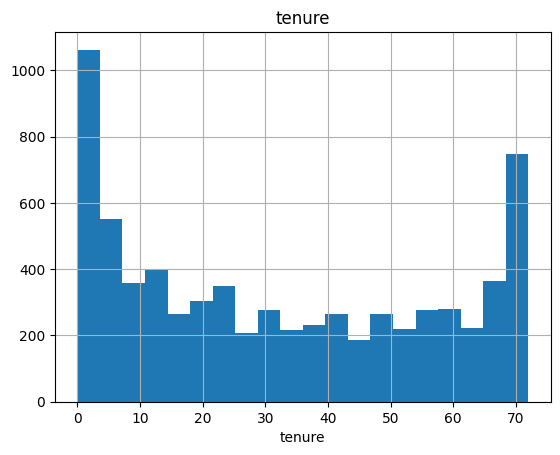

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


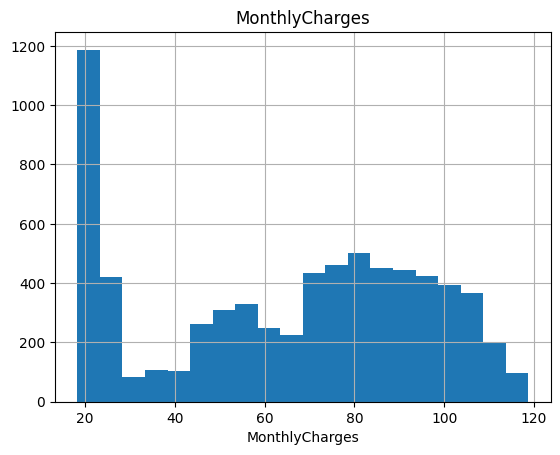

In [206]:
import matplotlib.pyplot as plt
def num_summary (dataframe ,numerical_col , plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df,col,plot = True)

### NUMERİK  ve Kategorik DEĞİŞKENLERİN TARGET GÖRE ANALİZİ


In [209]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}),end = "\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn",col)

          tenure
Churn           
No     37.569965
Yes    17.979133


       MonthlyCharges
Churn                
No          61.265124
Yes         74.441332




In [217]:
import pandas as pd

def target_summary_with_cat(dataframe, target, cat_col):
  
    print(f"### {cat_col} - {target} İstatistikleri ###")
    # Kategorik değişkenin her bir kategorisinin hedef değişkenin dağılımını gösterir
    print(dataframe.groupby(cat_col)[target].describe(), end="\n\n\n")

# Kategorik değişkenlerin hedef değişkenle olan analizini yapma
for col in cat_cols:  # cat_cols, daha önce tanımladığınız kategorik değişkenlerin listesidir
    target_summary_with_cat(df, "Churn", col)


### gender - Churn İstatistikleri ###
       count unique top  freq
gender                       
Female  3488      2  No  2549
Male    3555      2  No  2625


### Partner - Churn İstatistikleri ###
        count unique top  freq
Partner                       
No       3641      2  No  2441
Yes      3402      2  No  2733


### Dependents - Churn İstatistikleri ###
           count unique top  freq
Dependents                       
No          4933      2  No  3390
Yes         2110      2  No  1784


### PhoneService - Churn İstatistikleri ###
             count unique top  freq
PhoneService                       
No             682      2  No   512
Yes           6361      2  No  4662


### MultipleLines - Churn İstatistikleri ###
                 count unique top  freq
MultipleLines                          
No                3390      2  No  2541
No phone service   682      2  No   512
Yes               2971      2  No  2121


### InternetService - Churn İstatistikleri ###
           

### Aykırı Değer Analizi 

In [220]:
#Amacı: Belirtilen sütunda aykırı değerlerin sınırlarını hesaplamak.
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


    #Amacı: Bir sütunda aykırı değerlerin var olup olmadığını kontrol etmek.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


 # Amacı: Aykırı değerleri, belirlenen alt ve üst eşiklerle değiştirmek.
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)




tenure False
MonthlyCharges False


### Eksik Gözlem Analizi 

In [223]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [225]:
import pandas as pd
import numpy as np

# Eksik değer analizi fonksiyonu
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

# Eksik değerleri göster
na_columns = missing_values_table(df, na_name=True)

# 'TotalCharges' sütunundaki string değerleri sayısal değere çevir
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# 'TotalCharges' sütunundaki eksik değerleri median ile doldurmanın doğru yöntemi
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Eksik değerleri tekrar kontrol et
df.isnull().sum()


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Korelasyon 

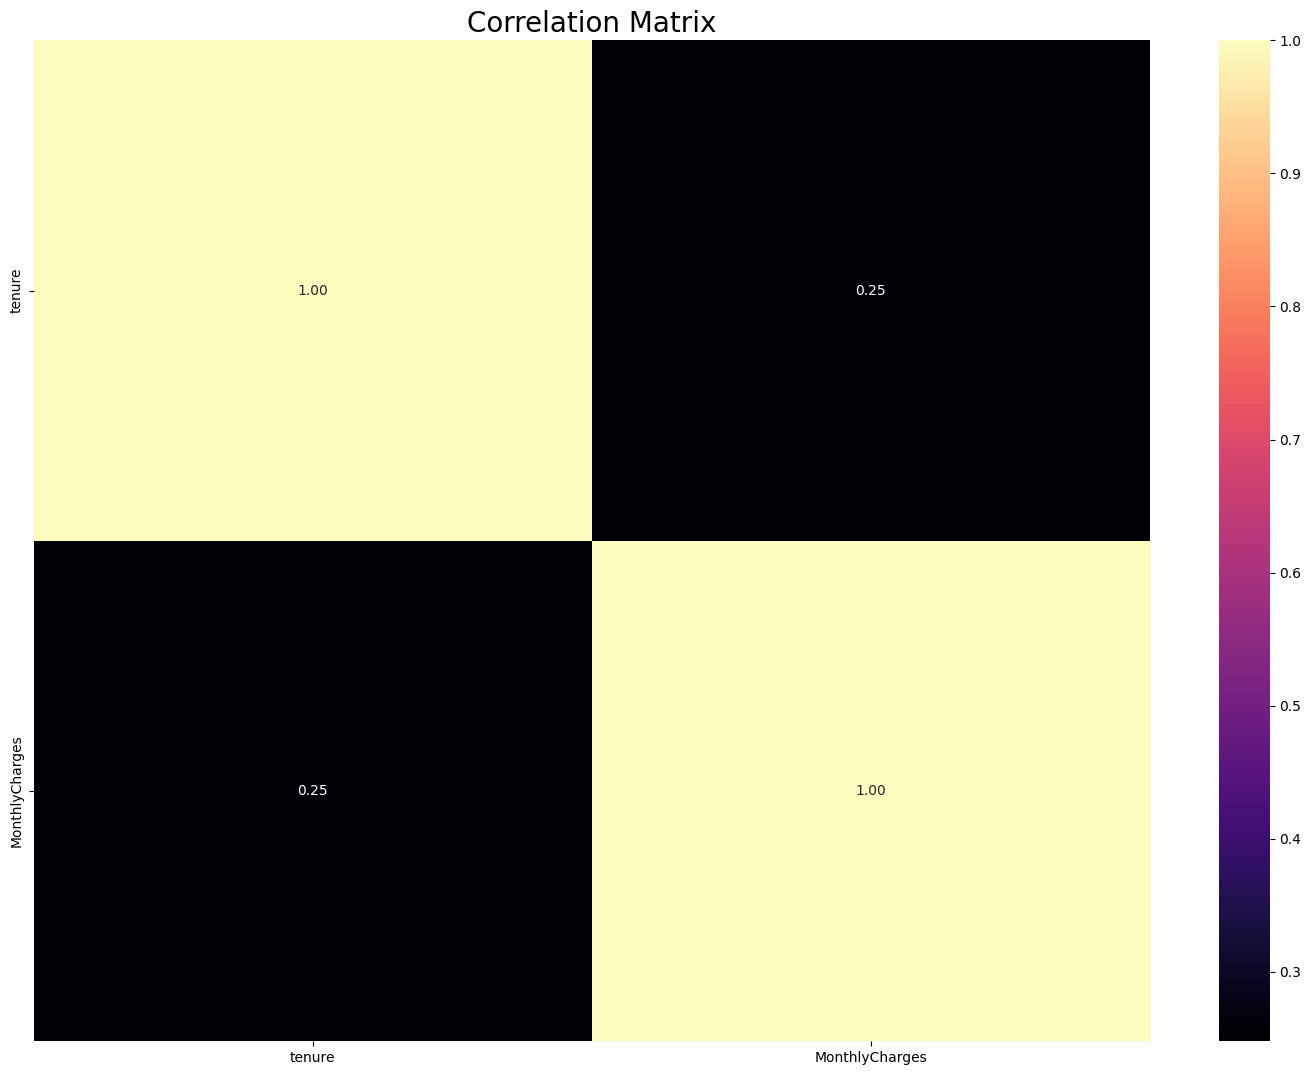

In [228]:
import matplotlib.pyplot as plt

df[num_cols].corr()

f,ax   =plt.subplots(figsize=[18,13])
sns.heatmap(df[num_cols].corr(),annot = True , fmt = ".2f", ax = ax,cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()



### ÖZELLİK ÇIKARIMI

In [231]:
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [233]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


df.head()
df.shape

(7043, 31)

### Encoding

In [236]:
from sklearn.preprocessing import LabelEncoder

cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 7


,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,True,False,False
1,5575-GNVDE,1,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,False,True,True,False,False,False
2,3668-QPYBK,1,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,45,0,0,42.30,1840.75,0,...,False,True,False,False,False,True,True,False,False,True
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,True,False,False


### Standartlastırma 

In [242]:
import pandas as pd

def standardize_columns(dataframe, cols_to_standardize):
    """
    Standartlaştırma işlemi yapar.
    
    Parameters:
    - dataframe: Standartlaştırılacak DataFrame
    - cols_to_standardize: Standartlaştırılacak sütun adları listesi
    
    Returns:
    - DataFrame: Standartlaştırılmış DataFrame
    """
    # Sütunların standartlaştırılması
    for col in cols_to_standardize:
        if col in dataframe.columns:
            mean = dataframe[col].mean()
            std = dataframe[col].std()
            dataframe[col] = (dataframe[col] - mean) / std
        else:
            print(f"{col} sütunu mevcut değil.")
    
    return dataframe

# Örnek kullanım
cols_to_standardize = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Standartlaştırılacak sütunlar
df_standardized = standardize_columns(df.copy(), cols_to_standardize)
print(df_standardized.head())


   customerID  gender  Partner  Dependents    tenure  PhoneService  \
0  7590-VHVEG       0        1           0 -1.277354             0   
1  5575-GNVDE       1        0           0  0.066323             1   
2  3668-QPYBK       1        0           0 -1.236636             1   
3  7795-CFOCW       1        0           0  0.514215             0   
4  9237-HQITU       0        0           0 -1.236636             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160241     -0.994171      0  ...   
1                 0       -0.259611     -0.173232      0  ...   
2                 1       -0.362635     -0.959606      1  ...   
3                 0       -0.746482     -0.194752      0  ...   
4                 1        0.197351     -0.940403      1  ...   

   NEW_TENURE_YEAR_2-3 Year  NEW_TENURE_YEAR_3-4 Year  \
0                     False                     False   
1                      True                     False   
2                

### Modelleme 

In [245]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# CatBoostClassifier ile model eğitimi
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

# Tahmin yapma
y_pred = catboost_model.predict(X_test)

# Sonuçları yazdırma
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 2)}")
print(f"Precision: {round(precision_score(y_test, y_pred), 2)}")
print(f"F1: {round(f1_score(y_test, y_pred), 2)}")
print(f"AUC: {round(roc_auc_score(y_test, y_pred), 2)}")


Accuracy: 0.79
Recall: 0.5
Precision: 0.65
F1: 0.56
AUC: 0.7
